# Manifolds

In this lab we will take some sample data where PCA fails
quite badly, but manifold methods are able to reduce the dimensionality
very well.

The first two cells are a done for you already.

In [1]:
# We use the sklearn make_s_curve tool to create 
# 1000 points in 3D space (we've called that X)
# The array called t is how far around the S curve
# those points are
%matplotlib inline
import matplotlib.pyplot
import sklearn.datasets
from mpl_toolkits.mplot3d import Axes3D
X, t = sklearn.datasets.samples_generator.make_s_curve(1000)




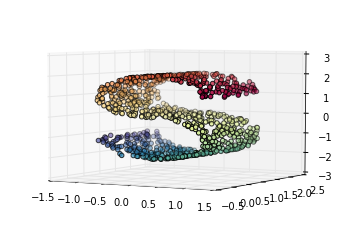

In [4]:
# Display this as a 3D figure. You can fiddle
# with the argument to view_init to view it from
# different angles. (It can take another argument
# to check the perspective)

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=matplotlib.pyplot.cm.Spectral)
ax.view_init(5)
#fig

In [9]:
# First, let's see what happens with PCA.
# Create a PCA object with n_components = 2
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2, whiten=True)

In [10]:
# Use fit_transform to turn X into a lower-dimensional
# data set
simpler = pca.fit_transform(X)

In [11]:
simpler

array([[ 1.3206337 , -0.80256064],
       [-1.51056697,  0.23600698],
       [-1.0979494 ,  1.52577735],
       ..., 
       [ 1.35843626,  0.09825612],
       [-0.06745256,  0.15069059],
       [-1.44492309,  0.71351997]])

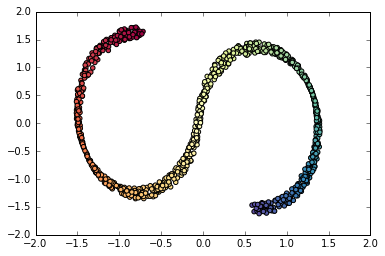

In [12]:
# Plot this with matplotlib.pyplot.scatter
# You can match the colours from the 3D plot above by including
#  c=t, cmap=matplotlib.pyplot.cm.Spectral
# as arguments to matplotlib.pyplot.scatter
matplotlib.pyplot.scatter(simpler[:,0], simpler[:, 1], c=t, cmap=matplotlib.pyplot.cm.Spectral)

In [15]:
# Note that green and blue were mapped together regularly,
# even though they are distantly apart in the original data set.
# Now import the sklearn.manifold library
import sklearn.manifold

In [16]:
# Create a LocallyLinearEmbedding object
# You want 2 dimensional data, so make sure n_components=2
# It is very sensitive to n_neighbours: try 10 initially and
# later on come back and explore the impact of changing it.
# Try method='modified' as this tends to give better results.
lle = sklearn.manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=10, method='modified')

In [17]:
# Use this LocallyLinearEmbedding object to fit_transform X
lle_transfored = lle.fit_transform(X)

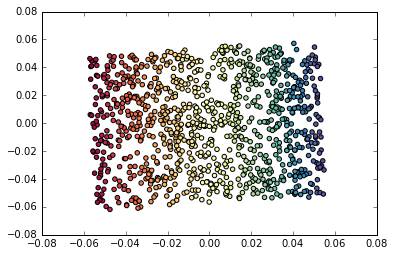

In [18]:
# Plot this data with matplotlib.pyplot.scatter
# Again, use c=t, cmap=matplotlib.pyplot.cm.Spectral
# to see how it performed
matplotlib.pyplot.scatter(lle_transfored[:,0], lle_transfored[:, 1], c=t, cmap=matplotlib.pyplot.cm.Spectral)

In [ ]:
#the towel has been stretched out!
#how do we reverse engineer that?